In [1]:
import tensorflow as tf
from tensorflow.keras import datasets , layers,models
import matplotlib.pyplot as plt
import numpy as np

d:\Users\Public\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(x_train ,y_train) ,(x_test,y_test) = datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [8]:
def sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

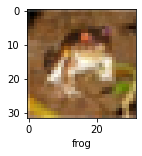

In [9]:
sample(x_train,y_train,0)

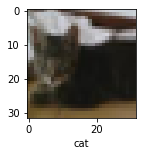

In [10]:
sample(x_train,y_train,9)

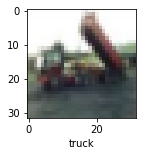

In [11]:
sample(x_train,y_train,2)

In [12]:
x_train = x_train / 255
x_test = x_test / 255

In [13]:
from tensorflow import keras

In [14]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [19]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [20]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
cnn.fit(x_train , y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 35s 19ms/step - loss: 1.5060 - accuracy: 0.4557
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1714 - accuracy: 0.5890
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0508 - accuracy: 0.6310
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9761 - accuracy: 0.6577
Epoch 5/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9205 - accuracy: 0.6772
Epoch 6/10
1563/1563 [==============================] - 48s 30ms/step - loss: 0.8734 - accuracy: 0.6952
Epoch 7/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8326 - accuracy: 0.7093
Epoch 8/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8003 - accuracy: 0.7197
Epoch 9/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7692 - accuracy: 0.7312
Epoch 10/10
1563/1563 [==============================] - 49s 31m

In [22]:
 cnn.evaluate(x_test , y_test)

313/313 [==============================] - 15s 13ms/step - loss: 0.8992 - accuracy: 0.6962


[0.899174690246582, 0.6962000131607056]

In [23]:
y_test = y_test.reshape(-1,)

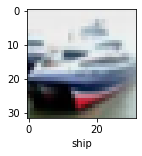

In [24]:
sample(x_test,y_test,1)

In [25]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 13s 13ms/step


array([[2.72921566e-03, 1.07991998e-03, 6.67134300e-03, 8.34638774e-01,
        6.60216727e-04, 9.02111754e-02, 5.54081611e-02, 7.22418772e-05,
        6.93098875e-03, 1.59792416e-03],
       [5.15070977e-03, 4.26494658e-01, 2.90911589e-06, 7.89401565e-06,
        1.09732767e-07, 7.37223047e-07, 4.29165630e-06, 4.74379558e-09,
        5.54065704e-01, 1.42729804e-02],
       [1.38540313e-01, 2.85200655e-01, 3.03866342e-03, 3.14762117e-03,
        1.96596445e-03, 2.61628331e-04, 2.05976394e-04, 1.15313429e-04,
        5.50095797e-01, 1.74280573e-02],
       [8.57042789e-01, 4.79890080e-03, 3.02152545e-03, 9.03551176e-04,
        1.54410687e-03, 7.84846270e-06, 3.68429522e-04, 8.58793192e-06,
        1.31591246e-01, 7.13099376e-04],
       [1.52573675e-05, 1.81282521e-05, 9.91248339e-03, 1.99416112e-02,
        7.93435514e-01, 3.27448733e-03, 1.73279017e-01, 7.68472673e-05,
        4.42381352e-05, 2.38500638e-06]], dtype=float32)

In [29]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [30]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [31]:
classes[y_classes[1]]

'ship'

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test,y_classes))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      1000
           1       0.80      0.82      0.81      1000
           2       0.69      0.50      0.58      1000
           3       0.52      0.47      0.49      1000
           4       0.68      0.60      0.64      1000
           5       0.57      0.63      0.60      1000
           6       0.75      0.80      0.77      1000
           7       0.69      0.79      0.74      1000
           8       0.80      0.79      0.80      1000
           9       0.76      0.80      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.69      0.70      0.69     10000
weighted avg       0.69      0.70      0.69     10000

